Mini-Project Motorway Madness 2
<br>velocity and position in seperate arrays

In [12]:
import numpy as np
import matplotlib.pyplot as plt

Initial setup for one lane system:

In [13]:
leng= 200
lanes= 3
objects= 70
vmin= 5
vmax= 10
p=0.25 #probability of dawdling
#can be changed

In [14]:
vel= np.zeros(objects) #base array for velocities of inputted number of vehicles

for i in range(len(vel)):
    vel[i]=np.random.randint(vmin,vmax+1) #pick random integer between vmin and vmax (vmax included)

In [15]:
positions= np.zeros([objects,2]) #base array for positions, an array of objects(number) arrays of length two where the second index in the arrays of length two is the lane.
    
for i in range(objects):
    space= leng/objects
    positions[i,0]=int(i*space)
    positions[i,1]=np.random.randint(1,lanes+1)

implementing rules:

In [16]:
def change(vel,pos):
    """implements the rules: if v<vmax and distance to next car>v+1, v increases by 1; and if driver at i sees driver at i+j,v, v=j-1. Then advances each vehicle by v sites.
    takes inputs of vel: an array of initial velocities and pos: an array of initial positions
    will out put an array of new velocities and an array of new positions"""
    foundk=False
    foundl=False
    #changing lane to right
    for i in range(objects-1):
        for k in range(1,objects-i):
            if pos[i,1]==pos[i+k,1] and pos[i+k,0]-pos[i,0]<=vel[i] and pos[i,1]<lanes:
                foundk=True
                for l in range(1,objects-i):
                    if pos[i+l,1]==pos[i,1]+1 and pos[i+l,0]-pos[i,0]>vel[i]:
                        foundl=True
                        pos[i,1]+=1
                    if foundl==True:
                        foundl=False
                        break
            if foundk==True:
                foundk=False
                break
    #Changing lane to left           
    for i in range(objects-1):
        for k in range(1,objects-i):
            if pos[i,1]==pos[i+k,1] and pos[i+k,0]-pos[i,0]<=vel[i] and pos[i,1]>1:
                foundk=True
                for l in range(1,objects-i):
                    if pos[i+l,1]==pos[i,1]-1 and pos[i+l,0]-pos[i,0]>vel[i]:
                        foundl=True
                        pos[i,1]-=1
                    if foundl==True:
                        foundl=False
                        break
            if foundk==True:
                foundk=False
                break
                  
    #changing velocity array
    foundj=False
    for i in range(objects-1):
        for j in range(0,objects-i):
            if pos[i,1]==pos[i+j,1] and vel[i]<vmax and pos[i+j,0]-pos[i,0]>vel[i]+1:
                foundj=True
                vel[i] +=1
            elif pos[i,1]==pos[i+j,1] and pos[i+j,0]-pos[i,0]<=vel[i]:
                foundj=True
                vel[i]= pos[i+1,0]-pos[i,0] -1
            if foundj==True:
                foundj=False
                break
            
        num=np.random.random() #picking a random value between 0 and 1
        if num<=p and vel[i]>0:
            vel[i]-=1
            
    
    #below is for the first vehicle in each lane
    firstcarindex=np.zeros(lanes)
    lastcarindex=np.zeros(lanes)
    for i in range(lanes): #i=0,1,2
        if len(np.where(pos[:,1]==i+1)[0])>0:
            firstcarindex[i]=np.min(np.where(pos[:,1]==i+1)) #gives index of first car in each lane
            lastcarindex[i]=np.max(np.where(pos[:,1]==i+1))#gives index of last car in each lane
        
            if vel[int(lastcarindex[i])]<vmax and pos[int(firstcarindex[i]),0]-pos[int(lastcarindex[i]),0]+leng>vel[int(lastcarindex[i])]+1:
                vel[int(lastcarindex[i])] +=1
            elif pos[int(firstcarindex[i]),0]-pos[int(lastcarindex[i]),0]+leng<=vel[int(lastcarindex[i])]:
                vel[int(lastcarindex[i])]= pos[int(firstcarindex[i]),0]-pos[int(lastcarindex[i]),0]+leng -1
            
    num=np.random.random() #picking a random value between 0 and 1
    if num<=p:
        vel[objects-1]-=1 
    
    
    #changing position array
    for i in range(objects):
        pos[i,0]+= vel[i]
    
        if pos[i,0]>leng-1: #-1 because pos[i,0] counts from 0
            pos[i,0]-=leng #if the length of the track is exceeded take vehicle back to beginning of track
   
    #rolling position and velocity arrays so vehicles are in correct order:
    #need to use np.sort on column and sort the velocity array at the same time
    structuredarray=np.zeros(objects,dtype={'names':['position','lane','velocity'],'formats':['i4','i4','i4']})
    structuredarray['position']=pos[:,0]
    structuredarray['lane']=pos[:,1]
    structuredarray['velocity']=vel
    #sorting structured array
    structuredarray = np.sort(structuredarray,order='position')
    #splitting back into usual arrays
    pos[:,0]=structuredarray['position']
    pos[:,1]=structuredarray['lane']
    vel=structuredarray['velocity']
    
    return vel, pos

In [17]:
def basicplot(positions):
    """converts the positions array used for updating the simulation into an array more useful for plotting data.
    Inputs: positions: array of positions and lanes for each vehicle
    outputs: an array of length equal to the length of the road and width equal to the number of lanes, each element will be filled with either 0 or 1, representing empty or occupied"""
    
    array=np.zeros((leng,lanes))
    
    for i in range(objects):
        j=int(positions[i,0]) #position along length of road
        k=int(positions[i,1])-1 #lane (-1 to count from 0)
        
        array[j,k]=1
        
    return array

In [18]:
def velplot(positions,vel):
    """converts the positions and velocity arrays used for updating the simulation into an array more useful for plotting data.
    Inputs: positions: array of positions and lanes for each vehicle, vel:array of velocities for each vehicle
    outputs: an array of length equal to the length of the road and width equal to the number of lanes, each element will be filled with either 0 or a number, representing empty or occupied, the value of the number represents the velocity"""
    
    array=np.zeros((leng,lanes))
    
    for i in range(objects):
        j=int(positions[i,0]) #position along length of road
        k=int(positions[i,1])-1 #lane (-1 to count from 0)
        
        array[j,k]=vel[i] + 1 #+1 so vehicles with velocity 0 can still be seen
        
    return array

[[  1.   1.]
 [  4.   1.]
 [  7.   1.]
 [  9.   1.]
 [ 13.   2.]
 [ 16.   1.]
 [ 19.   2.]
 [ 21.   2.]
 [ 24.   1.]
 [ 26.   3.]
 [ 30.   1.]
 [ 33.   2.]
 [ 36.   1.]
 [ 39.   2.]
 [ 41.   2.]
 [ 44.   2.]
 [ 47.   2.]
 [ 50.   1.]
 [ 53.   2.]
 [ 56.   2.]
 [ 59.   2.]
 [ 61.   2.]
 [ 64.   2.]
 [ 67.   1.]
 [ 70.   1.]
 [ 72.   3.]
 [ 76.   1.]
 [ 79.   2.]
 [ 81.   2.]
 [ 84.   2.]
 [ 87.   1.]
 [ 90.   1.]
 [ 92.   3.]
 [ 95.   1.]
 [ 99.   1.]
 [100.   3.]
 [104.   1.]
 [106.   2.]
 [110.   1.]
 [113.   2.]
 [116.   3.]
 [119.   1.]
 [121.   1.]
 [123.   2.]
 [126.   1.]
 [129.   2.]
 [133.   2.]
 [136.   3.]
 [139.   1.]
 [141.   2.]
 [143.   1.]
 [146.   2.]
 [149.   2.]
 [153.   1.]
 [156.   2.]
 [159.   2.]
 [161.   2.]
 [164.   2.]
 [167.   3.]
 [170.   1.]
 [173.   3.]
 [175.   1.]
 [179.   2.]
 [181.   2.]
 [184.   2.]
 [188.   1.]
 [189.   2.]
 [192.   2.]
 [196.   3.]
 [  3.   2.]]
[[  2.   1.]
 [  3.   1.]
 [  6.   1.]
 [  8.   2.]
 [ 11.   1.]
 [ 15.   2.]
 [ 18.   1.

[[ -1.   1.]
 [  2.   2.]
 [  7.   3.]
 [  8.   1.]
 [ 10.   2.]
 [ 11.   3.]
 [ 16.   2.]
 [ 18.   3.]
 [ 23.   1.]
 [ 26.   2.]
 [ 28.   1.]
 [ 30.   2.]
 [ 32.   1.]
 [ 37.   3.]
 [ 39.   2.]
 [ 44.   1.]
 [ 46.   3.]
 [ 48.   1.]
 [ 51.   2.]
 [ 53.   1.]
 [ 57.   3.]
 [ 58.   2.]
 [ 62.   3.]
 [ 66.   2.]
 [ 67.   1.]
 [ 71.   3.]
 [ 74.   2.]
 [ 76.   3.]
 [ 79.   2.]
 [ 81.   3.]
 [ 85.   2.]
 [ 88.   1.]
 [ 92.   3.]
 [ 93.   1.]
 [ 97.   3.]
 [100.   2.]
 [103.   3.]
 [104.   2.]
 [107.   1.]
 [110.   3.]
 [112.   2.]
 [118.   1.]
 [119.   3.]
 [122.   1.]
 [126.   2.]
 [130.   1.]
 [131.   2.]
 [132.   3.]
 [135.   2.]
 [138.   1.]
 [142.   2.]
 [147.   1.]
 [148.   2.]
 [150.   2.]
 [156.   3.]
 [158.   1.]
 [160.   2.]
 [162.   1.]
 [166.   3.]
 [168.   2.]
 [170.   1.]
 [176.   3.]
 [179.   2.]
 [181.   3.]
 [187.   2.]
 [190.   3.]
 [197.   1.]
 [198.   1.]
 [198.   3.]
 [  0.   3.]]
[[ -1.   1.]
 [  1.   3.]
 [  5.   2.]
 [  7.   2.]
 [  9.   1.]
 [ 10.   2.]
 [ 14.   3.

[[  0.   3.]
 [  5.   2.]
 [  6.   1.]
 [ 12.   3.]
 [ 13.   1.]
 [ 15.   2.]
 [ 17.   3.]
 [ 18.   2.]
 [ 25.   1.]
 [ 27.   2.]
 [ 32.   3.]
 [ 33.   2.]
 [ 37.   3.]
 [ 40.   1.]
 [ 42.   2.]
 [ 47.   1.]
 [ 48.   2.]
 [ 50.   1.]
 [ 53.   3.]
 [ 56.   3.]
 [ 60.   2.]
 [ 61.   3.]
 [ 66.   1.]
 [ 67.   2.]
 [ 70.   1.]
 [ 71.   3.]
 [ 77.   2.]
 [ 79.   2.]
 [ 81.   3.]
 [ 85.   1.]
 [ 87.   3.]
 [ 89.   2.]
 [ 91.   3.]
 [ 96.   2.]
 [ 99.   3.]
 [100.   2.]
 [108.   1.]
 [109.   3.]
 [111.   1.]
 [116.   2.]
 [117.   2.]
 [119.   3.]
 [121.   2.]
 [123.   1.]
 [127.   3.]
 [128.   3.]
 [136.   2.]
 [137.   2.]
 [138.   2.]
 [142.   3.]
 [145.   1.]
 [146.   2.]
 [150.   3.]
 [154.   1.]
 [155.   3.]
 [157.   2.]
 [163.   1.]
 [166.   2.]
 [167.   2.]
 [174.   3.]
 [178.   1.]
 [186.   2.]
 [188.   2.]
 [190.   2.]
 [192.   2.]
 [193.   1.]
 [194.   3.]
 [195.   2.]
 [199.   3.]
 [  0.   2.]]
[[ -1.   2.]
 [  4.   3.]
 [  5.   2.]
 [ 11.   1.]
 [ 12.   2.]
 [ 13.   1.]
 [ 16.   2.

[[  0.   1.]
 [  3.   2.]
 [  5.   3.]
 [  7.   2.]
 [ 13.   2.]
 [ 15.   3.]
 [ 19.   2.]
 [ 22.   3.]
 [ 25.   1.]
 [ 27.   3.]
 [ 29.   1.]
 [ 33.   2.]
 [ 36.   2.]
 [ 38.   3.]
 [ 41.   1.]
 [ 43.   2.]
 [ 47.   3.]
 [ 50.   3.]
 [ 54.   2.]
 [ 55.   2.]
 [ 58.   3.]
 [ 59.   2.]
 [ 65.   3.]
 [ 67.   1.]
 [ 69.   2.]
 [ 75.   3.]
 [ 76.   2.]
 [ 78.   3.]
 [ 80.   1.]
 [ 86.   2.]
 [ 87.   1.]
 [ 89.   2.]
 [ 94.   2.]
 [ 96.   2.]
 [100.   3.]
 [103.   1.]
 [106.   2.]
 [107.   3.]
 [109.   2.]
 [110.   2.]
 [115.   3.]
 [116.   3.]
 [125.   2.]
 [126.   3.]
 [127.   1.]
 [129.   2.]
 [133.   2.]
 [135.   3.]
 [136.   2.]
 [142.   1.]
 [143.   3.]
 [144.   2.]
 [152.   2.]
 [154.   2.]
 [155.   3.]
 [160.   2.]
 [167.   1.]
 [173.   3.]
 [176.   2.]
 [179.   1.]
 [180.   2.]
 [182.   3.]
 [184.   1.]
 [186.   2.]
 [189.   3.]
 [191.   2.]
 [195.   1.]
 [196.   3.]
 [199.   2.]
 [  0.   3.]]
[[  0.   1.]
 [  1.   3.]
 [  4.   2.]
 [  6.   3.]
 [ 12.   2.]
 [ 13.   2.]
 [ 18.   3.

[[  1.   1.]
 [  3.   3.]
 [  7.   2.]
 [  9.   3.]
 [ 13.   2.]
 [ 16.   3.]
 [ 18.   2.]
 [ 20.   3.]
 [ 23.   2.]
 [ 27.   3.]
 [ 28.   2.]
 [ 31.   3.]
 [ 36.   2.]
 [ 37.   3.]
 [ 40.   1.]
 [ 43.   3.]
 [ 46.   1.]
 [ 47.   2.]
 [ 52.   2.]
 [ 55.   3.]
 [ 57.   1.]
 [ 63.   2.]
 [ 66.   2.]
 [ 68.   3.]
 [ 69.   2.]
 [ 75.   3.]
 [ 76.   2.]
 [ 77.   2.]
 [ 82.   3.]
 [ 85.   1.]
 [ 87.   2.]
 [ 90.   2.]
 [ 92.   3.]
 [ 97.   2.]
 [ 98.   2.]
 [ 99.   3.]
 [103.   1.]
 [105.   2.]
 [109.   3.]
 [111.   2.]
 [116.   3.]
 [117.   1.]
 [120.   2.]
 [124.   3.]
 [125.   3.]
 [129.   2.]
 [131.   3.]
 [133.   2.]
 [139.   2.]
 [142.   3.]
 [144.   1.]
 [148.   3.]
 [154.   2.]
 [159.   3.]
 [164.   2.]
 [166.   1.]
 [168.   2.]
 [169.   2.]
 [171.   3.]
 [173.   2.]
 [176.   3.]
 [180.   2.]
 [182.   1.]
 [186.   3.]
 [194.   2.]
 [195.   1.]
 [196.   1.]
 [198.   2.]
 [198.   1.]
 [199.   3.]]
[[  2.   1.]
 [  6.   3.]
 [  8.   2.]
 [ 11.   3.]
 [ 14.   2.]
 [ 17.   3.]
 [ 18.   2.

[[  3.   2.]
 [  5.   3.]
 [  7.   1.]
 [ 10.   1.]
 [ 12.   2.]
 [ 16.   1.]
 [ 20.   3.]
 [ 23.   2.]
 [ 27.   3.]
 [ 29.   2.]
 [ 30.   2.]
 [ 34.   3.]
 [ 36.   2.]
 [ 40.   3.]
 [ 41.   3.]
 [ 45.   2.]
 [ 52.   3.]
 [ 54.   2.]
 [ 55.   3.]
 [ 59.   2.]
 [ 64.   3.]
 [ 66.   1.]
 [ 67.   3.]
 [ 69.   2.]
 [ 74.   2.]
 [ 75.   1.]
 [ 77.   2.]
 [ 80.   3.]
 [ 86.   2.]
 [ 87.   2.]
 [ 88.   3.]
 [ 92.   2.]
 [ 93.   2.]
 [ 95.   3.]
 [ 97.   1.]
 [104.   2.]
 [106.   2.]
 [107.   3.]
 [113.   2.]
 [114.   3.]
 [115.   2.]
 [120.   1.]
 [121.   3.]
 [128.   2.]
 [129.   3.]
 [131.   2.]
 [135.   1.]
 [140.   3.]
 [147.   2.]
 [149.   2.]
 [156.   3.]
 [157.   2.]
 [159.   2.]
 [160.   3.]
 [161.   2.]
 [164.   1.]
 [168.   3.]
 [172.   2.]
 [174.   3.]
 [183.   2.]
 [185.   1.]
 [186.   2.]
 [187.   1.]
 [190.   2.]
 [194.   2.]
 [194.   2.]
 [196.   3.]
 [197.   1.]
 [197.   2.]
 [199.   2.]]
[[  4.   2.]
 [  6.   3.]
 [  8.   1.]
 [ 11.   1.]
 [ 15.   2.]
 [ 18.   1.]
 [ 22.   3.

[[ -1.   2.]
 [  3.   3.]
 [  6.   1.]
 [ 12.   2.]
 [ 15.   2.]
 [ 18.   3.]
 [ 19.   2.]
 [ 21.   3.]
 [ 23.   2.]
 [ 27.   1.]
 [ 29.   2.]
 [ 32.   1.]
 [ 39.   2.]
 [ 43.   2.]
 [ 45.   3.]
 [ 47.   2.]
 [ 51.   3.]
 [ 52.   2.]
 [ 54.   3.]
 [ 57.   3.]
 [ 64.   2.]
 [ 65.   2.]
 [ 66.   3.]
 [ 69.   2.]
 [ 73.   2.]
 [ 76.   2.]
 [ 78.   3.]
 [ 80.   1.]
 [ 81.   3.]
 [ 84.   2.]
 [ 85.   3.]
 [ 91.   1.]
 [ 94.   3.]
 [ 96.   2.]
 [102.   3.]
 [103.   2.]
 [104.   3.]
 [108.   2.]
 [110.   2.]
 [114.   3.]
 [117.   1.]
 [119.   3.]
 [122.   2.]
 [127.   3.]
 [134.   2.]
 [135.   2.]
 [146.   3.]
 [147.   1.]
 [148.   2.]
 [149.   2.]
 [150.   2.]
 [152.   2.]
 [157.   1.]
 [162.   3.]
 [163.   2.]
 [169.   3.]
 [171.   3.]
 [175.   2.]
 [177.   2.]
 [178.   2.]
 [181.   3.]
 [184.   1.]
 [186.   2.]
 [187.   3.]
 [190.   2.]
 [192.   3.]
 [194.   1.]
 [196.   2.]
 [198.   1.]
 [  2.   1.]]
[[  1.   2.]
 [  2.   1.]
 [  5.   3.]
 [ 11.   1.]
 [ 13.   3.]
 [ 17.   2.]
 [ 18.   3.

[[  2.   1.]
 [  6.   3.]
 [  7.   2.]
 [  8.   1.]
 [ 12.   2.]
 [ 15.   3.]
 [ 17.   2.]
 [ 19.   3.]
 [ 26.   1.]
 [ 31.   3.]
 [ 33.   2.]
 [ 36.   3.]
 [ 38.   2.]
 [ 41.   2.]
 [ 42.   3.]
 [ 45.   1.]
 [ 50.   2.]
 [ 54.   1.]
 [ 55.   2.]
 [ 57.   3.]
 [ 59.   2.]
 [ 64.   2.]
 [ 66.   3.]
 [ 69.   2.]
 [ 70.   3.]
 [ 72.   2.]
 [ 75.   3.]
 [ 78.   2.]
 [ 81.   3.]
 [ 83.   2.]
 [ 89.   3.]
 [ 91.   3.]
 [ 93.   2.]
 [ 96.   1.]
 [ 98.   3.]
 [102.   2.]
 [106.   3.]
 [108.   1.]
 [109.   3.]
 [116.   2.]
 [121.   2.]
 [123.   3.]
 [134.   2.]
 [136.   2.]
 [138.   2.]
 [139.   3.]
 [140.   1.]
 [141.   2.]
 [144.   2.]
 [150.   2.]
 [152.   3.]
 [155.   2.]
 [160.   3.]
 [163.   1.]
 [164.   3.]
 [167.   2.]
 [168.   3.]
 [172.   2.]
 [174.   1.]
 [176.   3.]
 [179.   2.]
 [180.   3.]
 [183.   2.]
 [184.   3.]
 [189.   2.]
 [193.   2.]
 [195.   3.]
 [197.   1.]
 [199.   2.]
 [  2.   3.]]
[[  1.   1.]
 [  4.   3.]
 [  6.   3.]
 [  7.   2.]
 [ 11.   1.]
 [ 14.   2.]
 [ 16.   3.

[[  3.   1.]
 [  4.   2.]
 [  6.   3.]
 [ 13.   2.]
 [ 21.   3.]
 [ 23.   2.]
 [ 24.   3.]
 [ 26.   2.]
 [ 29.   1.]
 [ 32.   3.]
 [ 33.   3.]
 [ 38.   2.]
 [ 41.   3.]
 [ 44.   1.]
 [ 45.   2.]
 [ 47.   3.]
 [ 50.   2.]
 [ 53.   3.]
 [ 54.   2.]
 [ 56.   3.]
 [ 59.   1.]
 [ 64.   2.]
 [ 65.   1.]
 [ 70.   3.]
 [ 71.   2.]
 [ 77.   3.]
 [ 78.   2.]
 [ 82.   2.]
 [ 83.   3.]
 [ 85.   2.]
 [ 90.   3.]
 [ 94.   2.]
 [ 97.   2.]
 [ 98.   3.]
 [103.   2.]
 [109.   3.]
 [110.   2.]
 [121.   3.]
 [123.   1.]
 [127.   2.]
 [129.   3.]
 [130.   2.]
 [131.   1.]
 [132.   2.]
 [138.   3.]
 [140.   2.]
 [144.   3.]
 [147.   3.]
 [151.   2.]
 [153.   3.]
 [155.   2.]
 [158.   1.]
 [159.   3.]
 [164.   2.]
 [165.   2.]
 [167.   2.]
 [168.   2.]
 [170.   3.]
 [172.   1.]
 [177.   2.]
 [180.   2.]
 [183.   3.]
 [187.   2.]
 [189.   1.]
 [192.   2.]
 [195.   3.]
 [197.   2.]
 [198.   1.]
 [199.   2.]
 [  1.   3.]]
[[  2.   3.]
 [  3.   1.]
 [  5.   2.]
 [ 12.   3.]
 [ 19.   2.]
 [ 22.   2.]
 [ 23.   2.

[[ 13.   2.]
 [ 14.   2.]
 [ 18.   3.]
 [ 20.   2.]
 [ 22.   1.]
 [ 26.   2.]
 [ 27.   3.]
 [ 33.   2.]
 [ 34.   2.]
 [ 35.   2.]
 [ 37.   3.]
 [ 38.   2.]
 [ 43.   1.]
 [ 44.   2.]
 [ 47.   3.]
 [ 51.   2.]
 [ 54.   3.]
 [ 57.   1.]
 [ 61.   2.]
 [ 66.   3.]
 [ 68.   2.]
 [ 71.   3.]
 [ 73.   3.]
 [ 75.   2.]
 [ 76.   2.]
 [ 83.   3.]
 [ 86.   1.]
 [ 88.   2.]
 [ 91.   3.]
 [ 95.   2.]
 [ 98.   2.]
 [109.   3.]
 [111.   2.]
 [116.   2.]
 [117.   2.]
 [120.   3.]
 [121.   2.]
 [122.   3.]
 [126.   2.]
 [128.   3.]
 [130.   2.]
 [135.   3.]
 [139.   1.]
 [140.   3.]
 [144.   2.]
 [146.   2.]
 [148.   1.]
 [153.   3.]
 [155.   2.]
 [156.   3.]
 [157.   2.]
 [159.   2.]
 [162.   2.]
 [166.   3.]
 [168.   3.]
 [169.   1.]
 [175.   2.]
 [176.   2.]
 [178.   3.]
 [181.   2.]
 [188.   3.]
 [190.   2.]
 [192.   1.]
 [193.   3.]
 [194.   2.]
 [196.   3.]
 [197.   2.]
 [198.   1.]
 [199.   2.]
 [  1.   3.]]
[[ 11.   3.]
 [ 13.   2.]
 [ 17.   2.]
 [ 18.   3.]
 [ 21.   2.]
 [ 24.   1.]
 [ 26.   2.

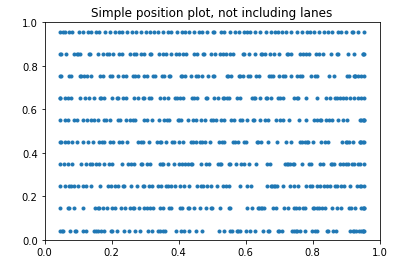

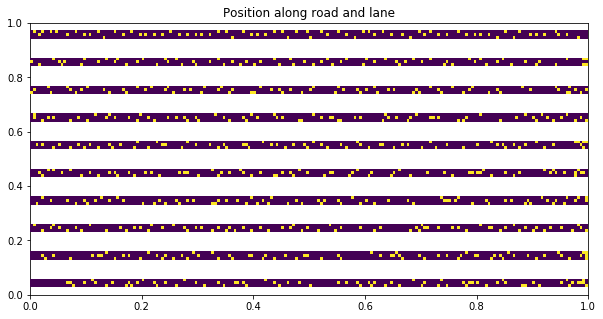

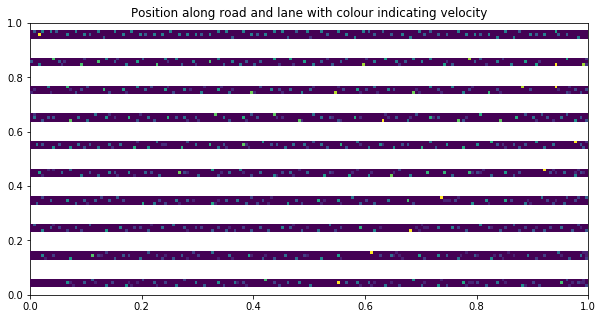

In [19]:
fig=plt.figure()
plt.title("Simple position plot, not including lanes")

figbasic=plt.figure(figsize=(10,5))
plt.title("Position along road and lane")

figvel=plt.figure(figsize=(10,5))
plt.title("Position along road and lane with colour indicating velocity")

index=1 #for subplots

for i in range(100):
    vel, positions = change(vel,positions)
    time=np.zeros(objects)
    time+=i
    
    #plots
    if i%10==0 or i==0:
        #lanes not shown
        ax=fig.add_subplot(10,1,index)
        ax.plot(positions[:,0],time,'.')
        ax.set_axis_off()
        
        #basic
        axbasic=figbasic.add_subplot(10,1,index)
        axbasic.imshow(basicplot(positions).T)
        axbasic.set_axis_off()
        
        #vel
        axvel=figvel.add_subplot(10,1,index)
        axvel.imshow(velplot(positions,vel).T)
        axvel.set_axis_off()
        
        index+=1
plt.show()

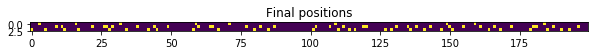

In [20]:
#final positions after 100 iterations
plot=basicplot(positions)

plt.figure(figsize=(10,15))
plt.imshow(plot.T)
plt.title("Final positions")
plt.show()

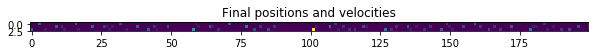

In [21]:
#final positions (and velocities) after 100 iterations
velplot=velplot(positions,vel)

plt.figure(figsize=(10,15))
plt.imshow(velplot.T)
plt.title("Final positions and velocities")
plt.show()

This is the completed, final multilane system.